In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   gender          48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  salary          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


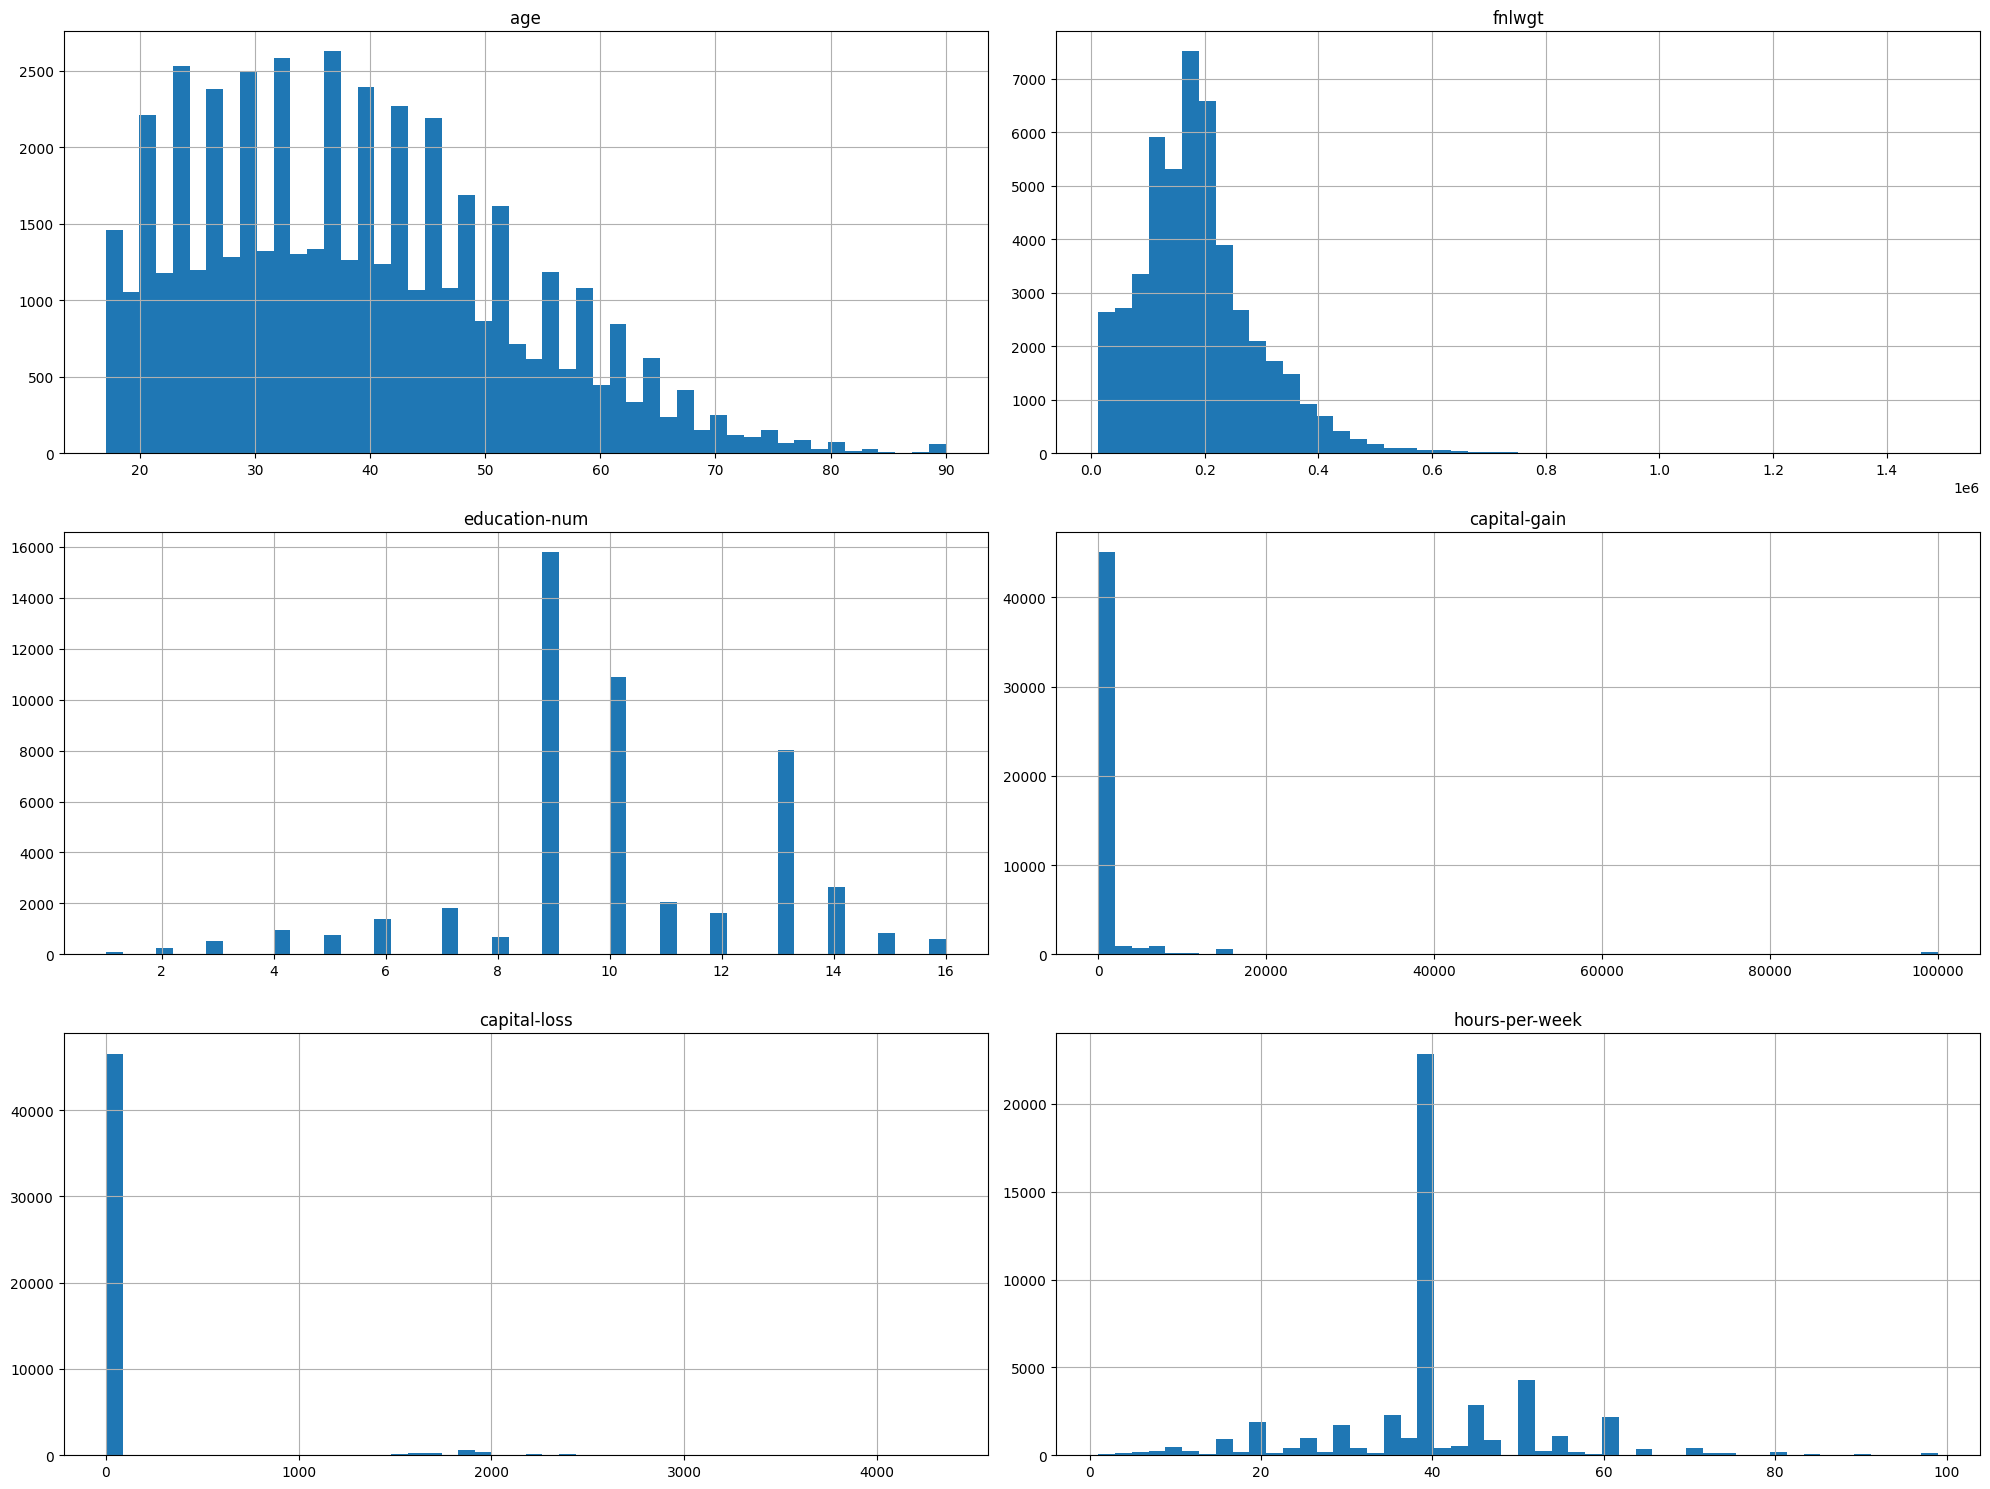

In [15]:
data=pd.read_csv("adult11.csv")
data.head()
data.info()
data.describe()
data.hist(bins=50, figsize=(20,15))
plt.tight_layout()

In [16]:
data.dropna(inplace=True)
print(data.isnull().sum())
data=pd.get_dummies(data)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


In [17]:
data.head()
data=data.drop("salary_<=50K",axis=1)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

X=data.drop("salary_>50K",axis=1)
y=data["salary_>50K"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

y_pred=dt_model.predict(X_test)
print("Model",dt_model.score(X_test,y_test))
print("Accuracy",accuracy_score(y_test,y_pred))
print("Confusion Metrics\n",confusion_matrix(y_test,y_pred))
print("Classification Report\n",classification_report(y_test,y_pred))

Model 0.8186098884225612
Accuracy 0.8186098884225612
Confusion Metrics
 [[6521  958]
 [ 814 1476]]
Classification Report
               precision    recall  f1-score   support

       False       0.89      0.87      0.88      7479
        True       0.61      0.64      0.62      2290

    accuracy                           0.82      9769
   macro avg       0.75      0.76      0.75      9769
weighted avg       0.82      0.82      0.82      9769



In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data.drop("salary_>50K", axis=1)
y = data["salary_>50K"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Feature Importances:\n", rf_model.feature_importances_)

Accuracy: 0.8596874360199277
Confusion Matrix:
 [[10413   820]
 [ 1236  2184]]
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.93      0.91     11233
        True       0.73      0.64      0.68      3420

    accuracy                           0.86     14653
   macro avg       0.81      0.78      0.80     14653
weighted avg       0.85      0.86      0.86     14653

Feature Importances:
 [1.50886698e-01 1.66085901e-01 6.43616267e-02 9.05435824e-02
 2.98546325e-02 8.41103196e-02 1.81543660e-03 5.03724418e-03
 5.53223898e-03 3.52198666e-06 1.01766916e-02 6.52551302e-03
 7.88526044e-03 4.53960162e-03 1.33789342e-04 1.57839905e-03
 1.87509092e-03 6.56130913e-04 2.27467489e-04 8.28605501e-04
 1.85121434e-03 1.09408323e-03 2.45564792e-03 2.90778408e-03
 1.21539677e-02 3.15676821e-03 6.48551419e-03 9.23196171e-03
 5.74574022e-05 3.80165635e-03 5.35184982e-03 6.22316853e-03
 2.93485889e-04 5.17410915e-02 9.72847306e-04 2.06941695e-02